In [1]:
# Import libraries for pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import libraries for model selection

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Create the dataframe

df = pd.read_csv('../Preprocessing/masterupdateafter2000.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,Avg>2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
0,03/08/07,Mechelen,Anderlecht,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/08/07,Charleroi,Roeselare,1.0,1.0,D,1.0,0.0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/08/07,Club Brugge,Bergen,2.0,1.0,H,1.0,1.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/08/07,Dender,Germinal,1.0,2.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04/08/07,FC Brussels,Westerlo,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Rename the columns 
def clean_data(df):
    # Rename column 'FTHG' to ' FTHG and HG = Full Time Home Team Goals'
    df = df.rename(columns={'FTHG': ' FTHG and HG = Full Time Home Team Goals'})
    # Rename column 'FTAG' to 'FTAG and AG = Full Time Away Team Goals'
    df = df.rename(columns={'FTAG': 'FTAG and AG = Full Time Away Team Goals'})
    # Rename column 'FTR' to 'FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'
    df = df.rename(columns={'FTR': 'FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'})
    # Rename column 'HTHG' to 'HTHG = Half Time Home Team Goals'
    df = df.rename(columns={'HTHG': 'HTHG = Half Time Home Team Goals'})
    # Rename column 'HTAG' to 'HTAG = Half Time Away Team Goals'
    df = df.rename(columns={'HTAG': 'HTAG = Half Time Away Team Goals'})
    # Rename column 'HTR' to 'HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'
    df = df.rename(columns={'HTR': 'HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'})
    # Rename column 'B365H' to ' B365H = Bet365 home win odds'
    df = df.rename(columns={'B365H': ' B365H = Bet365 home win odds'})
    # Rename column 'B365D' to ' B365D = Bet365 draw odds'
    df = df.rename(columns={'B365D': ' B365D = Bet365 draw odds'})
    # Rename column 'B365A' to 'B365A = Bet365 away win odds'
    df = df.rename(columns={'B365A': 'B365A = Bet365 away win odds'})
    # Rename column 'BWD' to 'BWH = Bet&Win home win odds'
    df = df.rename(columns={'BWD': 'BWH = Bet&Win home win odds'})
    # Rename column 'BWA' to 'BWD = Bet&Win draw odds'
    df = df.rename(columns={'BWA': 'BWD = Bet&Win draw odds'})
    # Rename column 'PSH' to 'PSH and PH = Pinnacle home win odds'
    df = df.rename(columns={'PSH': 'PSH and PH = Pinnacle home win odds'})
    # Rename column 'PSD' to ' PSD and PD = Pinnacle draw odds'
    df = df.rename(columns={'PSD': ' PSD and PD = Pinnacle draw odds'})
    # Rename column 'PSA' to ' PSA and PA = Pinnacle away win odds'
    df = df.rename(columns={'PSA': ' PSA and PA = Pinnacle away win odds'})
    # Rename column 'WHH' to ' WHH = William Hill home win odds'
    df = df.rename(columns={'WHH': ' WHH = William Hill home win odds'})
    # Rename column 'WHD' to 'WHD = William Hill draw odds'
    df = df.rename(columns={'WHD': 'WHD = William Hill draw odds'})
    # Rename column 'WHA' to 'WHA = William Hill away win odds'
    df = df.rename(columns={'WHA': 'WHA = William Hill away win odds'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()


,Date,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,"HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)",HS,...,Avg>2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
0,03/08/07,Mechelen,Anderlecht,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/08/07,Charleroi,Roeselare,1.0,1.0,D,1.0,0.0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/08/07,Club Brugge,Bergen,2.0,1.0,H,1.0,1.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/08/07,Dender,Germinal,1.0,2.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04/08/07,FC Brussels,Westerlo,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
distinct_values_away = df['AwayTeam'].unique()
distinct_values_home = df['HomeTeam'].unique()

print(sorted(distinct_values_away))
print(sorted(distinct_values_home))




['Aalst', 'Anderlecht', 'Antwerp', 'Beerschot VA', 'Bergen', 'Beveren', 'Cercle Brugge', 'Charleroi', 'Club Brugge', 'Dender', 'Eupen', 'FC Brussels', 'Genk', 'Gent', 'Germinal', 'Harelbeke', 'Heusden Zolder', 'Kortrijk', 'Lierse', 'Lokeren', 'Lommel', 'Louvieroise', 'Mechelen', 'Molenbeek', 'Mouscron', 'Mouscron-Peruwelz', 'Oostende', 'Oud-Heverlee Leuven', 'RWD Molenbeek', 'Roeselare', 'Seraing', 'St Truiden', 'St. Gilloise', 'Standard', 'Tubize', 'Waasland-Beveren', 'Waregem', 'Westerlo']
['Aalst', 'Anderlecht', 'Antwerp', 'Beerschot VA', 'Bergen', 'Beveren', 'Cercle Brugge', 'Charleroi', 'Club Brugge', 'Dender', 'Eupen', 'FC Brussels', 'Genk', 'Gent', 'Germinal', 'Harelbeke', 'Heusden Zolder', 'Kortrijk', 'Lierse', 'Lokeren', 'Lommel', 'Louvieroise', 'Mechelen', 'Molenbeek', 'Mouscron', 'Mouscron-Peruwelz', 'Oostende', 'Oud-Heverlee Leuven', 'RWD Molenbeek', 'Roeselare', 'Seraing', 'St Truiden', 'St. Gilloise', 'Standard', 'Tubize', 'Waasland-Beveren', 'Waregem', 'Westerlo']


In [17]:
# Transform categorical data into numerical data

from sklearn.preprocessing import LabelEncoder
import pickle

def encode_data(df):
    le = LabelEncoder()
    df['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'] = le.fit_transform(df['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'])
    df['HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'] = le.fit_transform(df['HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)']) 
    df['Date'] = le.fit_transform(df['Date'])
    df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
    df['AwayTeam'] = le.fit_transform(df['AwayTeam'])
    
    filename = 'encoder.pkl'
    pickle.dump(le, open(filename, 'wb'))
    return df

df_encoded = encode_data(df_clean.copy())
df_encoded.head()

df_encoded

,Date,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,"HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)",HS,...,Avg>2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
0,166,22,1,0.0,1.0,0,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,232,7,29,1.0,1.0,1,1.0,0.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,232,8,4,2.0,1.0,2,1.0,1.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232,9,14,1.0,2.0,0,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,232,11,37,0.0,1.0,0,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,291,18,29,1.0,0.0,2,1.0,0.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6289,291,19,14,1.0,2.0,0,0.0,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6290,291,31,11,0.0,1.0,0,0.0,1.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6291,291,33,13,0.0,2.0,0,0.0,2.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:


# with kNN for numerical columns

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df_encoded)
df_filled = pd.DataFrame(df_filled, columns=df.columns)

# save the df in a csv file

df_filled.to_csv('df_filled.csv', index=False)


In [6]:
# General statistics

df_filled.describe()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,Avg>2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
count,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,...,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000
mean,1037.904497,17.811537,17.797553,1.620531,1.225648,1.174956,0.691165,0.525902,1.102972,12.583903,...,1.695554,-0.268691,1.927444,1.922207,1.945269,1.931239,1.987357,1.980747,1.917821,1.909584
std,599.269111,11.320902,11.325138,1.332502,1.160210,0.850038,0.843530,0.723139,0.758432,4.143124,...,0.116597,0.582696,0.069603,0.070112,0.070808,0.070961,0.069444,0.069852,0.064910,0.064393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.260000,-2.500000,1.700000,1.650000,1.710000,1.700000,1.800000,1.800000,1.730000,1.720000
25%,522.000000,8.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.500000,...,1.620000,-0.625000,1.880000,1.875000,1.895000,1.880000,1.940000,1.930000,1.870000,1.860000
50%,1032.000000,17.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,12.000000,...,1.690000,-0.250000,1.930000,1.925000,1.945000,1.930000,1.985000,1.980000,1.915000,1.910000
75%,1554.000000,27.000000,27.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,15.000000,...,1.770000,0.125000,1.980000,1.975000,1.995000,1.980000,2.035000,2.030000,1.960000,1.955000
max,2089.000000,37.000000,37.000000,9.000000,9.000000,2.000000,6.000000,5.000000,3.000000,33.000000,...,2.270000,2.000000,2.250000,2.150000,2.190000,2.180000,2.230000,2.230000,2.120000,2.120000


In [7]:
df_filled.head()
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6293 non-null   float64
 1   HomeTeam  6293 non-null   float64
 2   AwayTeam  6293 non-null   float64
 3   FTHG      6293 non-null   float64
 4   FTAG      6293 non-null   float64
 5   FTR       6293 non-null   float64
 6   HTHG      6293 non-null   float64
 7   HTAG      6293 non-null   float64
 8   HTR       6293 non-null   float64
 9   HS        6293 non-null   float64
 10  AS        6293 non-null   float64
 11  HST       6293 non-null   float64
 12  AST       6293 non-null   float64
 13  HF        6293 non-null   float64
 14  AF        6293 non-null   float64
 15  HC        6293 non-null   float64
 16  AC        6293 non-null   float64
 17  HY        6293 non-null   float64
 18  AY        6293 non-null   float64
 19  HR        6293 non-null   float64
 20  AR        6293 non-null   floa

In [8]:
df_filled.columns


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
       'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA'],
      dtype='object')

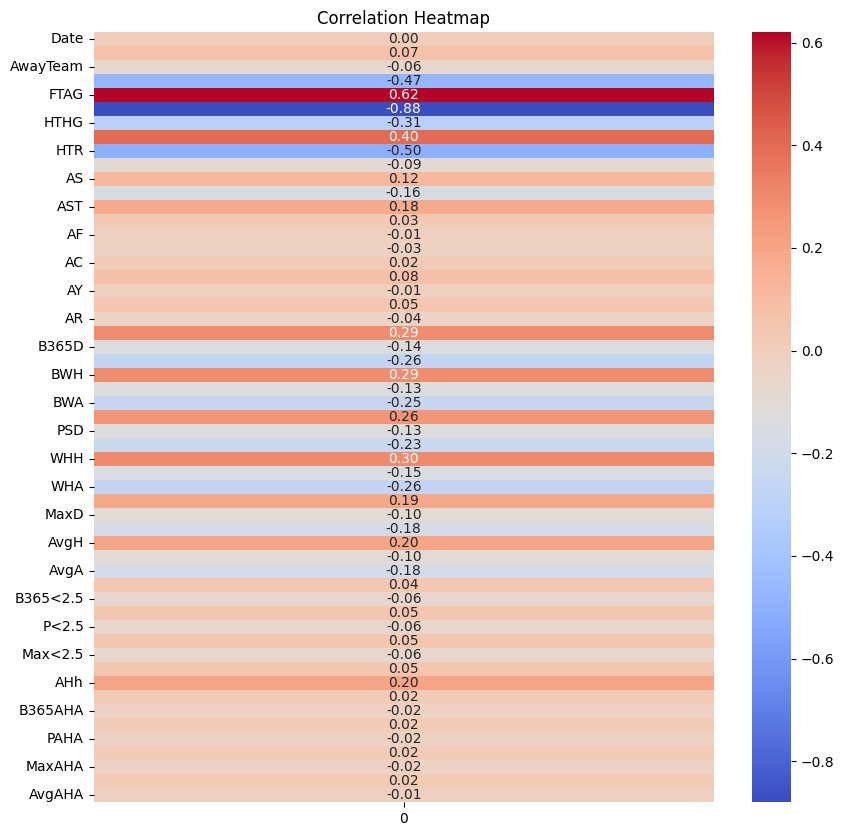

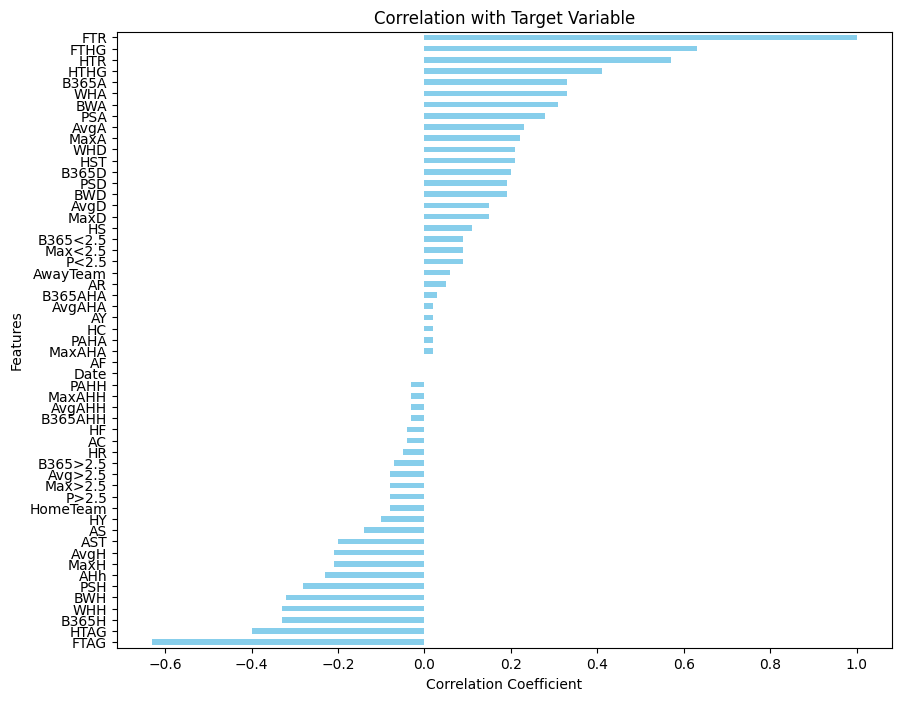

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
correlations = df_filled.corrwith(df_filled['FTR'] == 0).round(2)

# Plot heatmap
plt.figure(figsize=(10, 10))  # Reduced size to 10x10 for better fit
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')

# Title and display
plt.title('Correlation Heatmap')
plt.show()


import matplotlib.pyplot as plt

# Calculate correlations
correlations = df_filled.corrwith(df_filled['FTR']).round(2)

# Plot bar plot
plt.figure(figsize=(10, 8))
correlations.dropna().sort_values().plot(kind='barh', color='skyblue')  # Drop NaNs and sort values
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [10]:
# Choose the features that have a correlation coefficient greater than 0.1
features = correlations[correlations > 0.1].index.tolist()
features.remove('FTR')  # Remove target variable
features

['FTHG',
 'HTHG',
 'HTR',
 'HS',
 'HST',
 'B365D',
 'B365A',
 'BWD',
 'BWA',
 'PSD',
 'PSA',
 'WHD',
 'WHA',
 'MaxD',
 'MaxA',
 'AvgD',
 'AvgA']

In [11]:
# Split the data into features and target variable


X = df_filled[features]
y = df_filled['FTR']

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'XGBoost': XGBClassifier(),Random Forest: 0.68
Gradient Boosting: 0.70
SVM: 0.70
Logistic Regression: 0.70
K-Nearest Neighbors: 0.61


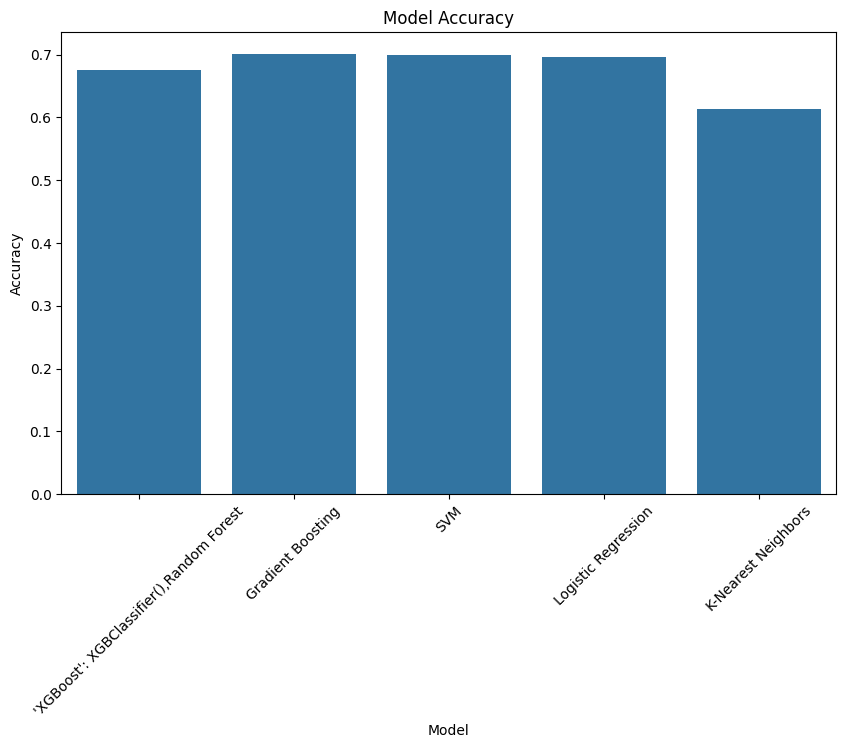

In [12]:
# Try other models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
'''from xgboost import XGBClassifier'''


# Create the models

models = {
    ''''XGBoost': XGBClassifier(),'''
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Print the accuracy of each model

for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy:.2f}')


# Plot the accuracy of each model

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# save the model to pkl file

import pickle

# Save the best model to Streamlit folder

best_model = max(accuracy_dict, key=accuracy_dict.get)
model = models[best_model]
filename = f'{best_model}.pkl'
pickle.dump(model, open(filename, 'wb'))

